In [31]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Stellar mass vs. $v_\text{max}$

First, imports:

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os

import dataset
from curve_fit import calc_median

## Get data

Next, I retrieve the data. We are only interested in luminous halos. Also, there might be some spurious cases with odd values of $v_\text{max}$.

In [33]:
# Get LCDM data:
LCDM = dataset.Dataset("V1_LR_fix_127_z000p000", "LCDM")
vmaxSat, vmaxIsol = LCDM.get_subhalos("Vmax",True)
SMSat, SMIsol = LCDM.get_subhalos("Stars/Mass",True)

# Exclude dark halos
maskSat = np.logical_and.reduce((vmaxSat>0, SMSat>0))
maskIsol = np.logical_and.reduce((vmaxIsol>0, SMIsol>0))

# Convert to proper units:
vmaxSat = vmaxSat[maskSat] / 100000 # cm/s to km/s 
vmaxIsol = vmaxIsol[maskIsol] / 100000
SMSat = SMSat[maskSat] * units.g.to(units.Msun)
SMIsol = SMIsol[maskIsol] * units.g.to(units.Msun)

## Plot

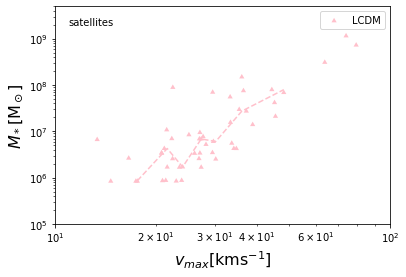

In [55]:
fig, axes = plt.subplots()

# Set axes:
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(10, 100)
axes.set_ylim(10**5, 5*10**9)

# Set labels:
axes.set_xlabel('$v_{max}[\mathrm{km s^{-1}}]$', fontsize=16)
axes.set_ylabel('$M_*[\mathrm{M_\odot}]$', fontsize=16)
axes.text(11, 2*10**9, 'satellites')
#axes.set_title('Stellar mass of satellites')
#axes.text(11, 2*10**9, 'isolated galaxies')
#axes.set_title('Stellar mass of isolated galaxies')

# Set marker styles:
color = {LCDM.name : "pink"}
marker = {LCDM.name : (3,0,0)}

# Add LCDM scatter plot:
axes.scatter(vmaxSat, SMSat, marker=marker[LCDM.name], c=color[LCDM.name], \
        edgecolor='none', label=LCDM.name)

# Add LCDM median:
median = calc_median(vmaxSat, SMSat, points_per_bar=7)
axes.plot(median[0], median[1], c=color[LCDM.name], linestyle='--')

axes.legend(loc=0)

# Save figure:

filename = 'SM_vs_Vmax_sat.png'
#filename = 'SM_vs_Vmax_isol.png'

home = os.path.dirname(dataset.__file__)
path = os.path.join(home,"Figures")

# If the directory does not exist, create it
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(os.path.join(path,filename))